In [64]:
# !pip install memory-profiler
%load_ext memory_profiler

# !pip install bitarray
from bitarray import bitarray

import datetime

import numpy as np
import matplotlib.pyplot as plt

import random

import time

import gc

import sys

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## Memory usage

###  Arrays

#### Built-in array of integers

In [65]:
%memit a = [1]*1000
print("Size of a, Size of a[0]")
sys.getsizeof(a), sys.getsizeof(a[0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of a, Size of a[0]


(8056, 28)

#### Built-in array of booleans

In [66]:
%memit b = [True]*1000
print("Size of b, Size of b[0]")
sys.getsizeof(b), sys.getsizeof(b[0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of b, Size of b[0]


(8056, 28)

#### Numpy array of bits

In [67]:
%memit p = np.ones(1000, dtype=bool)
print("Size of p, Size of p[0]")
sys.getsizeof(p), sys.getsizeof(p[0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of p, Size of p[0]


(1112, 25)

#### Bitarray

In [68]:
%memit c = bitarray('1'*1000)
print("Size of c, Size of c[0]")
sys.getsizeof(c), sys.getsizeof(c[0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of c, Size of c[0]


(216, 28)

### Matrices

#### Built-in matrix of integers

In [69]:
N = 30
M = 1000

In [70]:
%memit a = [[1]*M for _ in range(N)]
print("Size of a, Size of a[0], Size of a[0][0]")
sys.getsizeof(a), sys.getsizeof(a[0]), sys.getsizeof(a[0][0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of a, Size of a[0], Size of a[0][0]


(312, 8056, 28)

#### Built-in matrix of booleans

In [71]:
%memit b = [[True]*M for _ in range(N)]
print("Size of b, Size of b[0], Size of b[0][0]")
sys.getsizeof(b), sys.getsizeof(b[0]), sys.getsizeof(b[0][0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of b, Size of b[0], Size of b[0][0]


(312, 8056, 28)

#### Numpy matrix of bits

In [72]:
%memit p = np.ones((N, M), dtype=bool)
print("Size of p, Size of p[0], Size of p[0][0]")
sys.getsizeof(p), sys.getsizeof(p[0]), sys.getsizeof(p[0][0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of p, Size of p[0], Size of p[0][0]


(30128, 112, 25)

#### Bitarray matrix

In [73]:
%memit c = [bitarray('1'*M) for _ in range(N)]
print("Size of c, Size of c[0], Size of c[0][0]")
sys.getsizeof(c), sys.getsizeof(c[0]), sys.getsizeof(c[0][0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of c, Size of c[0], Size of c[0][0]


(312, 216, 28)

In [74]:
%memit d = bitarray('1'*M*N)
print("Size of d, Size of d[0]")
sys.getsizeof(d), sys.getsizeof(d[0])

peak memory: 129.64 MiB, increment: 0.00 MiB
Size of d, Size of d[0]


(4060, 28)

In [75]:
# Print the first 5 rows and 5 columns of d
for row in range(5):
    print(d[row*M:(row+1)*M])
    print()


bitarray('111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [76]:
path = "./"
path_out = "./"

In [77]:
class Matrix:
    def __init__(self, data, cols):
        self.data = data
        self.rows = len(data) // cols
        self.cols = cols

In [78]:
# Count the number of lines to skip from
# the beginning of the file
def count_comment_lines(filename):
    with open(filename, 'r') as f:
        return sum(1 for line in f if line.startswith(";;;"))

In [79]:
# Count the total number of lines in the file
def count_total_lines(filename):
    with open(filename, 'r') as f:
        return sum(1 for line in f)

In [80]:
# Count the number of columns in the file,
# that is, the cardinality of the domain of the
# sets (rows)
def detect_columns(filename, offset):
    with open(filename, 'r') as f:
        for _ in range(offset):
            next(f)  # skip lines
        line = next(f).strip().split()
        return len(line) - 1  # excluding the trailing "-"

In [81]:
# Read the file and return a matrix (array of bitarrays)
def read_file(filename, rows, cols, offset):
    # First, we skip the first offset lines
    # (they are comments or already read rows
    # from a previous call to read_file),
    # then we read the next rows lines,
    # we append a bitarray for each line
    # and return the matrix (array of bitarrays)
    with open(filename, 'r') as f:
        for _ in range(offset):
            next(f)  # skip lines

        n_rows = 0
        n_cols = 0

        # Matrix (a flat bitarray)
        data = bitarray()
        for _ in range(rows):
            line = next(f, None)
            if line is None:
                break
            # Transforming
            # "1 0 1 0 -"
            # into
            # [1, 0, 1, 0]
            numbers = list(map(int, line.strip().split()[:-1]))  # excluding the trailing "-"
            
            if len(numbers) != cols:
                print("Error: wrong number of columns in row")
                break
                
            # # Transforming
            # # [1, 0, 1, 0]
            # # into
            # # '1010'
            # bit_string = ''.join(map(str, numbers))
            # # Transforming
            # # '1010'
            # # into
            # # bitarray('1010')
            # numbers = bitarray(bit_string)
            
            # Append the bitarray to the matrix
            data.extend(numbers)

        return Matrix(data, cols)


def read_rows_from_file(filename, cols, offset, list_idx_2_read):
    # We read specific rows from the file, this is useful
    # for the recursive function "explore"
    with open(filename, 'r') as f:
        # Skip the first offset lines
        for _ in range(offset):
            next(f)

        # To keep track of the index of the row 
        # we are reading from the file,
        # we save a tuple containing the index and the row
        data = []

        # This time we don't have a block of rows to read
        # but we have to read all the rows until the last one
        # contained in list_ix_2_read, so we could range over
        # the maximum of list_idx_2_read
        for k in range(max(list_idx_2_read) + 1):
            line = next(f, None)
            if line is None:
                break
            if k in list_idx_2_read:
                numbers = list(map(int, line.strip().split()[:-1]))
                if len(numbers) != cols:
                    print("Error: wrong number of columns in row", k)
                    break
                    
                # bit_string = ''.join(map(str, numbers))
                # numbers = bitarray(bit_string)
                data.append((k, bitarray(numbers)))
        return data

In [82]:
# Returns True if two rows have a common '1', else False
def intersect(row1, row2):
    return (row1 & row2).any()

# Return the union of two rows (bitwise OR)
def union(row1, row2):
    return row1 | row2

In [83]:
# Conceptual function showing the nodes 
# that would be visited, in lexical order,
# without any pruning.
# ATTENTION: these function 
# explode when the number of rows gets big enough
# (really soon)

def EC_full_visit(nodes=[]):
    visited = []
    for node in nodes:
        visited.append((node,))
        full_explore(node, radix=(node,), visited=visited)
    return visited


def full_explore(node, radix=(), visited=[]):
    for j in range(node):
        v_node = radix + (j,)
        visited.append(v_node)
        if j == 0:
            continue
        else:
            full_explore(j, v_node, visited)

def EC_light_full_visit(nodes=0):
    n_visited = 0
    for node in range(nodes):
        n_visited += 1
        n_visited += full_explore_light(node)
    return n_visited+1

def full_explore_light(node):
    n_visited = 0
    for j in range(node):
        n_visited += 1
        if j == 0:
            continue
        else:
            n_visited += full_explore_light(j)
    return n_visited



print(EC_full_visit([4, 2, 3]))
print("----------------")
print(EC_light_full_visit(1))
print("----------------")
print(EC_light_full_visit(3))
print("----------------")
print(EC_light_full_visit(4))
print("----------------")


[(4,), (4, 0), (4, 1), (4, 1, 0), (4, 2), (4, 2, 0), (4, 2, 1), (4, 2, 1, 0), (4, 3), (4, 3, 0), (4, 3, 1), (4, 3, 1, 0), (4, 3, 2), (4, 3, 2, 0), (4, 3, 2, 1), (4, 3, 2, 1, 0), (2,), (2, 0), (2, 1), (2, 1, 0), (3,), (3, 0), (3, 1), (3, 1, 0), (3, 2), (3, 2, 0), (3, 2, 1), (3, 2, 1, 0)]
----------------
2
----------------
8
----------------
16
----------------


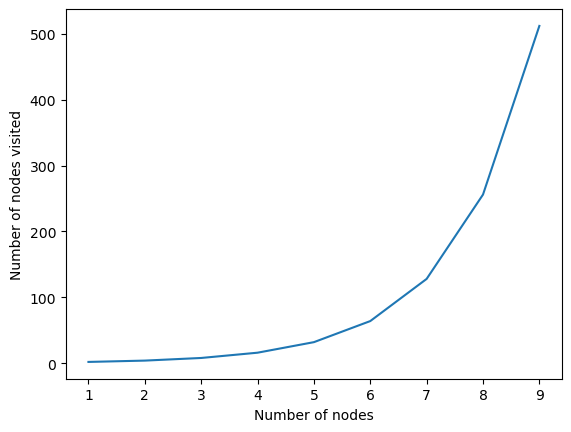

In [84]:
# Plotting the number of nodes visited by the full exploration
# of the search tree, as a function of the number of nodes in the
# graph.
n_visited = []
for i in range(1, 10):
    n_visited.append(EC_light_full_visit(i))
plt.plot(range(1, 10), n_visited)
plt.xlabel("Number of nodes")
plt.ylabel("Number of nodes visited")
plt.show()

The previous functions will not be used, but they helped to understand the number of explorable nodes,
which is **exponential**: $2^n$.

In [85]:
def EC(A, B, COV, offset, FILE_NAME, LOADABLE_ROWS, explored=[], max_explorations=-1):
    # Offset is the index of the first row of A 
    # to read in the current chunk being read,
    # initially it is 0, then it is increased
    # by LOADABLE_ROWS at each iteration
    A_N = A.rows
    A_M = A.cols

    B_N = B.rows
    B_M = B.cols

    # Number of comment lines to skip
    comment_lines = count_comment_lines(FILE_NAME)
    # exploration_times = []

    # We iterate over the rows of 
    # the current chunk of A
    for i in range(A_N):

        # Current row (set) of A
        row_data = A.data[i*A_M : (i+1)*A_M]

        # If the row is empty, we skip it
        if sum(row_data) == 0:
            for t in range(A_N):
                B_index = (t * B_N) + (i + offset)
                B.data[B_index] = 0
                B.data[(i + offset) * B_N + t] = 0
            continue

        explored.append((offset + i,))

        # If the row is a cover,
        # we add it to the set of covers
        # and we skip it
        if sum(row_data) == A_M:
            for t in range(B_N):
                B_index = (t * B_N) + (i + offset)
                B.data[B_index] = 0
                B.data[(i + offset) * B_N + t] = 0
            COV.add((offset + i,))
            continue

        # We need reading_offset because
        # we have to read LOADABLE_ROWS rows
        # at a time from the beginning of the file,
        # even if the current chunk starts 
        # from the middle of the file, because
        # we have to read also the rows that are
        # before the current chunk, in order
        # to compute the intersection between
        # the current row and all the previous rows
        reading_offset = 0

        while reading_offset < i + offset:

            # Read again the rows from the beginning
            # of the file in chunks of LOADABLE_ROWS,
            # in order to find the compatible rows with the current row
            # among all the rows before the current row
            old_A = read_file(FILE_NAME, LOADABLE_ROWS, A_M, reading_offset+comment_lines)

            for j in range(min(old_A.rows, i + offset - reading_offset)):

                explored.append((offset + i, j + reading_offset))

                old_row_data = old_A.data[j*A_M : (j+1)*A_M]

                if sum(old_row_data) in [0, A_M]:
                    continue

                if intersect(old_row_data, row_data):
                    B.data[(j + reading_offset) * B_N + (i + offset)] = 0
                else:
                    # I takes the value of all the couples of indexes
                    # of the rows that are compatible
                    I = (offset + i, j + reading_offset)
                    U = union(old_row_data, row_data)
                    if sum(U) == A_M:
                        # We have found a cover
                        COV.add(tuple(sorted(I)))
                        # When we find a cover, by definition
                        # we don't consider the rows as compatible
                        # anymore, they theoretically are but they
                        # are not useful anymore since we don't need
                        # to investigate them anymore
                        B.data[(j + reading_offset) * B_N + (i + offset)] = 0
                    else:
                        # We have found a couple of compatible rows
                        B.data[(j + reading_offset) * B_N + (i + offset)] = 1
                        # inter is the list of indexes of the rows
                        # that are compatible with both the rows in the couple
                        # (I)
                        inter = [k for k in range(j + reading_offset) if B.data[k * B_N + (i + offset)] and B.data[k * B_N + (j + reading_offset)]]
                        
                        # if inter is not empty,
                        # we have to read the rows from the file
                        # that are indexed by inter
                        # and store them in k_A
                        if inter:
                            # Read the rows from the file
                            # that are in inter
                            k_A = read_rows_from_file(FILE_NAME, A_M, comment_lines, inter)
                            
                            # Start the exploration
                            explore(I, U, inter, COV, k_A, B, offset, old_A.cols, FILE_NAME, 1, explored, max_explorations)

                            # Stop the exploration if the maximum number of explorations
                            # has been reached
                            if max_explorations != -1 and len(explored) >= max_explorations:
                                return
                            
            reading_offset += LOADABLE_ROWS
    return


def explore(I, U, inter, COV, k_A, B, offset, A_M, FILE_NAME, LOADABLE_ROWS=1, explored=[], max_explorations=-1):
    # Terminate the exploration if the maximum number of explorations
    # has been reached
    if max_explorations != -1 and len(explored) >= max_explorations:
        return

    # Growing the list of explored sets
    if explored[-1] != tuple(I):
        explored.append(tuple(I))   

    for k in inter:
        # i_temp is the new set of rows
        # (a candidate for the cover)
        i_temp = I + (k,)
        
        # Get the k-th row from k_A,
        # we get all of them one by one
        # and start a new exploration
        # with that row
        row_data = [row for index, row in k_A if index == k][0]
        
        # u_temp is the union between
        # the current row and the union
        # of the rows in I
        u_temp = union(U, row_data)

        if sum(u_temp) == A_M:
            # We have found a cover
            COV.add(tuple(sorted(i_temp)))
            explored.append(i_temp)
        else:
            # get the 
            inter_temp = [l for l in inter if l < k and B.data[l * B.cols + k]]
            if inter_temp:
                explore(i_temp, u_temp, inter_temp, COV, k_A, B, offset, A_M, FILE_NAME, LOADABLE_ROWS, explored)



In [86]:
def EC_star(A, B, COV, offset, FILE_NAME, LOADABLE_ROWS, explored=[], max_explorations=-1, card=[]):
    A_N = A.rows
    A_M = A.cols

    B_N = B.rows
    B_M = B.cols

    comment_lines = count_comment_lines(FILE_NAME)

    for i in range(A_N):
        row_data = A.data[i*A_M : (i+1)*A_M]

        if sum(row_data) == 0:
            for t in range(B_N):
                B_index = (t * B_N) + (i + offset)
                B.data[B_index] = 0
                B.data[(i + offset) * B_N + t] = 0
            continue

        explored.append((offset + i,))

        if sum(row_data) == A_M:
            for t in range(B_N):
                B_index = (t * B_N) + (i + offset)
                B.data[B_index] = 0
                B.data[(i + offset) * B_N + t] = 0
            COV.add((offset + i,))
            continue

        card[i+offset] = sum(row_data)

        reading_offset = 0

        while reading_offset < i + offset:

            old_A = read_file(FILE_NAME, LOADABLE_ROWS, A_M, reading_offset+comment_lines)

            for j in range(min(old_A.rows, i + offset - reading_offset)):

                explored.append((offset + i, j + reading_offset))

                old_row_data = old_A.data[j*A_M : (j+1)*A_M]

                if sum(old_row_data) in [0, A_M]:
                    continue

                if intersect(old_row_data, row_data):
                    B.data[(j + reading_offset) * B_N + (i + offset)] = 0
                else:
                    I = (offset + i, j + reading_offset)
                    card_U = card[i+offset] + card[j+reading_offset]
                    if card_U == A_M:
                        COV.add(tuple(sorted(I)))
                        B.data[(j + reading_offset) * B_N + (i + offset)] = 0
                    else:
                        B.data[(j + reading_offset) * B_N + (i + offset)] = 1
                        inter = [k for k in range(j + reading_offset) if B.data[k * B_N + (i + offset)] and B.data[k * B_N + (j + reading_offset)]]
                        if inter:
                            k_A = read_rows_from_file(FILE_NAME, A_M, comment_lines, inter)

                            explore_star(I, card_U, inter, COV, k_A, B, offset, old_A.cols, FILE_NAME, 1, explored, max_explorations, card)
                            
                            if max_explorations != -1 and len(explored) >= max_explorations:
                                return

            reading_offset += LOADABLE_ROWS

    return


def explore_star(I, card_U, inter, COV, k_A, B, offset, A_M, FILE_NAME, LOADABLE_ROWS=1, explored=[], max_explorations=-1, card=[]):
    if max_explorations != -1 and len(explored) >= max_explorations:
        return

    if explored[-1] != tuple(I):
        explored.append(tuple(I))   

    for k in inter:
        i_temp = I + (k,)
        
        row_data = [row for index, row in k_A if index == k][0]

        card_temp = card_U + sum(row_data)

        if card_temp == A_M:
            COV.add(tuple(sorted(i_temp)))
            explored.append(i_temp)
        else:
            inter_temp = [l for l in inter if l < k and B.data[l * B.cols + k]]
            if inter_temp:
                explore_star(i_temp, card_temp, inter_temp, COV, k_A, B, offset, A_M, FILE_NAME, LOADABLE_ROWS, explored, max_explorations, card)



In [87]:
def incremental_process(A, B, COV, offset, FILE_NAME, LOADABLE_ROWS, explored=set(), max_explorations=-1, mode="base", card=[]):
    
    # Find exact covers within the new chunk
    if mode == "base":
        EC(A, B, COV, offset, FILE_NAME, LOADABLE_ROWS, explored, max_explorations)
    elif mode == "star":
        EC_star(A, B, COV, offset, FILE_NAME, LOADABLE_ROWS, explored, max_explorations, card)
    return

In [88]:
# Creating a function that takes a filename and a number of loadable rows
# and solves the exact cover problem incrementally:

def incremental_exact_cover(filename, loadable_rows, verbose=False, explored=set(), max_explorations=-1, filename_out=None, mode="base", ratio=False):

    # Counting the comments
    comment_lines = count_comment_lines(filename)
    
    # Detecting the number of columns
    n_columns = detect_columns(filename, comment_lines)
    print(f"Total columns: {n_columns}")

    # Counting the total number of rows
    total_rows = count_total_lines(filename) - comment_lines
    print(f"Total rows: {total_rows}")

    # Starting to write on the output file rows and columns
    if filename_out is not None:
        with open(filename_out, 'w') as f:
            f.write("*********************************\n")
            f.write("*            PROBLEM            *\n")
            f.write("*********************************\n")
            f.write(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
            f.write(f"Sets: {total_rows}\nDomain cardinality: {n_columns}\n")

    # Initializing the A_matrix B
    # B = [bitarray('0'*total_rows) for _ in range(total_rows)]
    B = bitarray('0'*total_rows*total_rows)
    B_matrix = Matrix(B, total_rows)

    # # Setting elements of B under the diagonal to -1
    # # for testing purposes
    # for i in range(total_rows):
    #     for j in range(i):
    #         B[i][j] = -1

    # Initializing the set of visited nodes
    explored = []

    # Initializing the set of partitions (solutions)
    COV = set()

    # Initializing the cardinality array
    # when mode is "star"
    # if mode == "star":
    card = [0]*total_rows


    # Initializing the offset
    offset = 0

    while True:
        A_matrix = read_file(filename, loadable_rows, n_columns, offset+comment_lines)
        if not A_matrix.data:
            break

        if verbose:
            print("Portion of A read: from row", offset+1, "to row", offset+A_matrix.rows)
        # for i in range(A_matrix.rows):
        #     print(A_matrix.data[i * A_matrix.cols:i * A_matrix.cols + A_matrix.cols])
        # print("Found complete sets:", A_matrix.ones)

        # Writing all the rows of the A_matrix preceded by "#{index}-> "
        if filename_out is not None:
            with open(filename_out, 'a') as f:
                # for i, row in enumerate(A_matrix.data):
                #     f.write(f"#{i+offset}-> ")
                #     for col in row:
                #         f.write(f"{col} ")
                #     f.write("\n")
                for i in range(A_matrix.rows):
                    f.write(f"#{i+offset}-> ")
                    f.write(f"{A_matrix.data[i * A_matrix.cols:i * A_matrix.cols + A_matrix.cols]}\n")

        incremental_process(A_matrix, B_matrix, COV, offset, filename, loadable_rows, explored, max_explorations, mode=mode, card=card)

        if len(explored) >= max_explorations and max_explorations != -1:
            # print("Max explorations reached")
            # print("I: ", I)
            # print("COV:", COV)
            return COV, explored

        if verbose:
            print("Explored:", len(explored))

            print("B:")
            for row in range(total_rows):
                print(B[row*total_rows:(row+1)*total_rows])

            print("COV:")
            print(COV)

        offset += A_matrix.rows

    print("Explored:", len(explored))

    if verbose:
        print("Size of COV: ", sys.getsizeof(COV))
        print("Explored nodes:\n", explored)
        print("Solutions:", COV)

    print("#solutions:", len(COV))

    # Listing the explorable nodes to compare with the
    # actual explored nodes
    # First, taking all the explored radix nodes (the tuples
    # in the list explored
    # containing only one element)
    if ratio:
        n_explorable = 0
        for node in explored:
            if len(node) == 1:
                n_explorable += 2**node[0]

    if filename_out is not None:
        with open(filename_out, 'a') as f:
            f.write("*********************************\n")
            f.write("*            SOLUTIONS          *\n")
            f.write("*********************************\n")
            f.write(f"#solutions: {len(COV)}\n")
            f.write("Solutions:\n")
            for solution in COV:
                f.write(f"{solution}\n")
            f.write("*********************************\n")
            f.write("*         EXPLORED NODES        *\n")
            f.write("*********************************\n")
            f.write(f"#explored nodes: {len(explored)}\n")
            if ratio:
                f.write(f"#explorable nodes: {n_explorable}\n")
                f.write(f"Ratio of explored nodes:{len(explored) / n_explorable}\n")
            f.write("Explored nodes:\n")
            for node in explored:
                f.write(f"{node}\n")
            f.write("*********************************\n")
            f.write("*            MATRIX B           *\n")
            f.write("*********************************\n")
            for row in range(total_rows):
                f.write(f"{B[row*total_rows:(row+1)*total_rows]}\n")
            f.write("*********************************\n")
            f.write("*             END               *\n")

    return COV, explored

In [89]:
# Testing the resolution on a small instance

# 1 0 1 0 0 0 0 0 0 1 -
# 0 0 0 1 0 0 1 1 1 0 -
# 0 1 0 1 0 0 0 1 0 0 -
# 0 1 0 0 1 1 0 0 0 0 -
# 0 0 0 0 1 1 1 0 1 0 -
# 0 1 1 0 0 0 0 0 0 1 -
# 1 0 0 0 1 1 0 0 0 0 -
# 1 0 0 1 0 0 0 1 0 0 -

cov, explored = incremental_exact_cover(path+"ec_instance.txt", loadable_rows=1, verbose=True, max_explorations=-1, filename_out=path_out+"ec_instance_out.txt", ratio=True)

print("Solutions:")
for solution in cov:
    sets = [f"S_{i+1}" for i in solution]
    print(", ".join(sets))

Total columns: 10
Total rows: 8
Portion of A read: from row 1 to row 1
Explored: 1
B:
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
set()
Portion of A read: from row 2 to row 2
Explored: 3
B:
bitarray('01000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
set()
Portion of A read: from row 3 to row 3
Explored: 6
B:
bitarray('01100000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
set()
Portion of A read: from row 4 to row 4
Explored: 11
B:
bitarray('01110000')
bitarray('00010000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
{(0, 1, 3)}
Portion of A read: from row 5

In [90]:
explored

[(0,),
 (1,),
 (1, 0),
 (2,),
 (2, 0),
 (2, 1),
 (3,),
 (3, 0),
 (3, 1),
 (3, 1, 0),
 (3, 2),
 (4,),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 2, 0),
 (4, 3),
 (5,),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6,),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 5, 1),
 (7,),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 5, 4),
 (7, 6)]

In [91]:
# Solving the same instance with the star version
cov, explored = incremental_exact_cover(path+"ec_instance.txt", loadable_rows=1, verbose=True, max_explorations=-1, filename_out=path_out+"ec_instance_out_star.txt", mode="star", ratio=True)
print("Solutions:")
for solution in cov:
    sets = [f"S_{i+1}" for i in solution]
    print(", ".join(sets))

Total columns: 10
Total rows: 8
Portion of A read: from row 1 to row 1
Explored: 1
B:
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
set()
Portion of A read: from row 2 to row 2
Explored: 3
B:
bitarray('01000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
set()
Portion of A read: from row 3 to row 3
Explored: 6
B:
bitarray('01100000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
set()
Portion of A read: from row 4 to row 4
Explored: 11
B:
bitarray('01110000')
bitarray('00010000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
bitarray('00000000')
COV:
{(0, 1, 3)}
Portion of A read: from row 5

In [92]:
# Solving a custom one just
# so we are sure that the algorithm works

# 1 1 1 1 1 1 1 1 -
# 1 1 1 1 1 0 0 0 -
# 0 0 0 0 0 1 1 0 -
# 0 0 0 0 0 0 0 1 -
# 1 1 1 1 1 1 1 0 -
# 0 0 0 0 0 0 0 0 -
# 0 0 0 0 0 0 0 0 -
# 0 0 0 0 0 0 0 0 -
# 0 0 0 0 0 0 0 0 -
# 0 0 0 0 0 0 0 0 -
# 0 0 0 0 0 0 0 0 -
# 1 1 0 0 1 1 0 0 -
# 0 0 1 1 0 0 1 1 -
# 0 0 0 1 1 0 0 1 -
# 0 0 0 0 0 1 1 0 -

cov, _ = incremental_exact_cover(path+"ec_manual.txt", loadable_rows=10, verbose=True, max_explorations=-1, filename_out=path_out+"ec_manual_out.txt", ratio=True)

Total columns: 8
Total rows: 15
Portion of A read: from row 1 to row 10
Explored: 16
B:
bitarray('000000000000000')
bitarray('001100000000000')
bitarray('000100000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
COV:
{(0,), (1, 2, 3), (3, 4)}
Portion of A read: from row 11 to row 15
Explored: 71
B:
bitarray('000000000000000')
bitarray('001100000000001')
bitarray('000100000000010')
bitarray('000000000001001')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000001')
bitarray('00

In [93]:
# and with the star version
cov, _ = incremental_exact_cover(path+"ec_manual.txt", loadable_rows=10, verbose=True, max_explorations=-1, filename_out=path_out+"ec_manual_out_star.txt", mode="star")

Total columns: 8
Total rows: 15
Portion of A read: from row 1 to row 10
Explored: 16
B:
bitarray('000000000000000')
bitarray('001100000000000')
bitarray('000100000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
COV:
{(0,), (1, 2, 3), (3, 4)}
Portion of A read: from row 11 to row 15
Explored: 71
B:
bitarray('000000000000000')
bitarray('001100000000001')
bitarray('000100000000010')
bitarray('000000000001001')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000000')
bitarray('000000000000001')
bitarray('00

## Solving problems with exact cover

### Sudoku

In [94]:
def sudoku_to_exact_cover(sudoku, N):
    constraints = 4  # Cell, Row, Column, Box
    cover_matrix = [[0] * (N * N * constraints) for _ in range(N * N * N)]
    box_size = int(N ** 0.5)
    for r in range(N):
        for c in range(N):
            for n in range(N):
                # Calculate row index for cover_matrix
                idx = (r * N + c) * N + n
                
                # Cell constraint - first N^2 columns
                cover_matrix[idx][r * N + c] = 1

                # Row constraint - second N^2 columns
                cover_matrix[idx][N * N + r * N + n] = 1

                # Column constraint - third N^2 columns
                cover_matrix[idx][2 * N * N + c * N + n] = 1

                # Box constraint - (fourth) last N^2 columns
                box_row = r // box_size
                box_col = c // box_size
                b = box_row * box_size + box_col  # This has changed from 3 to 2 for 4x4 Sudoku
                cover_matrix[idx][3 * N * N + b * N + n] = 1
                
    # Prune rows that correspond to filled cells in the grid
    # by setting them to all zeros.

    # Find rows corresponding to filled cells by
    # checking if the corresponding entry in the
    # Sudoku grid is not equal to zero
    # (zero represents an empty cell.)
    rows_to_remove = []
    for r in range(N):
        for c in range(N):
            num = sudoku[r * N + c]-1
            if num+1:
                start_idx = (r * N + c) * N
                for i in range(N):
                    if i != num:
                        rows_to_remove.append(start_idx + i)

    # Setting the rows to all zeros
    for idx in sorted(rows_to_remove):
        cover_matrix[idx] = [0] * (N * N * constraints)
                
    return cover_matrix


In [95]:
def exact_cover_solution_to_sudoku(partition, N):
    solution = [[0] * N for _ in range(N)]
    
    for idx in partition:
        r, c, n = idx // (N * N), (idx // N) % N, (idx % N) + 1
        solution[r][c] = n
        
    return solution

In [96]:
def read_sudoku_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    sudoku = []
    for line in lines:
        row = [int(num) for num in line.strip().split(",") if num]
        sudoku.extend(row)

    return sudoku

In [97]:
# Function that takes in input a sudoku.sdk filename 
# containing the sudoku in human readable format 
# and outputs a sudoku.exc filename containing the
# the sudoku in the exact cover format.
# The default comment is a timestamp.
import datetime

def sdk_to_exc(sdk_filename, exc_filename, comment=""):
    sudoku = read_sudoku_from_file(sdk_filename)
    N = int(len(sudoku) ** 0.5)
    cover_matrix = sudoku_to_exact_cover(sudoku, N)
    comment = comment + "\n" + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    comment = comment + "\n" + f"Sudoku {N}x{N}"
    with open(exc_filename, "w") as f:
        # for each line, append ";;; " at the beginning
        for line in comment.split("\n"):
            f.write(";;; " + line + "\n")
        for row in cover_matrix:
            f.write(" ".join(map(str, row)) + " -\n")

In [98]:
sdk_to_exc(path+"sudoku_easy_4x4.sdk.txt", path_out+"sudoku_easy_4x4.exc.txt")
sdk_to_exc(path+"sudoku_pre_intermediate_4x4.sdk.txt", path_out+"sudoku_pre_intermediate_4x4.exc.txt")
sdk_to_exc(path+"sudoku_medium_4x4.sdk.txt", path_out+"sudoku_medium_4x4.exc.txt")
sdk_to_exc(path+"sudoku_hard_4x4.sdk.txt", path_out+"sudoku_hard_4x4.exc.txt")


In [99]:
%%time
# This easy, 5 blanks
# 1, 2, 0, 4,
# 4, 3, 2, 0,
# 3, 1, 0, 2,
# 2, 4, 0, 0,

%memit sol_sudoku_easy_4x4, _ = incremental_exact_cover(path_out+"sudoku_easy_4x4.exc.txt", loadable_rows=1, filename_out=path_out+"sudoku_easy_4x4.out.txt", ratio=True)
print("Solutions:")
print(sol_sudoku_easy_4x4)

Total columns: 64
Total rows: 64
Explored: 171280
#solutions: 1
peak memory: 147.72 MiB, increment: 18.38 MiB
Solutions:
{(0, 5, 10, 15, 19, 22, 25, 28, 34, 36, 43, 45, 49, 55, 56, 62)}
CPU times: user 1.14 s, sys: 88.8 ms, total: 1.23 s
Wall time: 1.34 s


In [100]:
# Checking the solution
print("Sudoku:")
solved_sudoku_easy_4x4 = exact_cover_solution_to_sudoku(sol_sudoku_easy_4x4.pop(), 4)
for row in solved_sudoku_easy_4x4:
    print(row)

Sudoku:
[1, 2, 3, 4]
[4, 3, 2, 1]
[3, 1, 4, 2]
[2, 4, 1, 3]


In [101]:
%%time
# and with the star version
%memit sol_sudoku_easy_4x4_star, _ = incremental_exact_cover(path_out+"sudoku_easy_4x4.exc.txt", loadable_rows=1, filename_out=path_out+"sudoku_easy_4x4.out.txt", mode="star", ratio=True)
print("Solutions:")
print(sol_sudoku_easy_4x4_star)

Total columns: 64
Total rows: 64
Explored: 171280
#solutions: 1
peak memory: 165.34 MiB, increment: 17.62 MiB
Solutions:
{(0, 5, 10, 15, 19, 22, 25, 28, 34, 36, 43, 45, 49, 55, 56, 62)}
CPU times: user 1.01 s, sys: 79.2 ms, total: 1.09 s
Wall time: 1.21 s


In [102]:
%%time
# This is pre intermediate, 6 blanks

# 3, 0, 4, 1
# 0, 1, 0, 2
# 0, 4, 0, 3
# 2, 0, 1, 4

%memit sol_sudoku_pre_intermediate_4x4, _ = incremental_exact_cover(path_out+"sudoku_pre_intermediate_4x4.exc.txt", loadable_rows=100, filename_out=path_out+"sudoku_pre_intermediate_4x4.out.txt", ratio=True)
print("Solutions:")
print(sol_sudoku_pre_intermediate_4x4)

Total columns: 64
Total rows: 64
Explored: 207515
#solutions: 1
peak memory: 167.73 MiB, increment: 4.64 MiB
Solutions:
{(2, 5, 11, 12, 19, 20, 26, 29, 32, 39, 41, 46, 49, 54, 56, 63)}
CPU times: user 1.49 s, sys: 79.8 ms, total: 1.57 s
Wall time: 1.68 s


In [103]:
# Checking the solution
print("Sudoku:")
solved_sudoku_pre_intermediate_4x4 = exact_cover_solution_to_sudoku(sol_sudoku_pre_intermediate_4x4.pop(), 4)
for row in solved_sudoku_pre_intermediate_4x4:
    print(row)


Sudoku:
[3, 2, 4, 1]
[4, 1, 3, 2]
[1, 4, 2, 3]
[2, 3, 1, 4]


In [104]:
%%time
# and with the star version
%memit sol_sudoku_pre_intermediate_4x4_star, _ = incremental_exact_cover(path_out+"sudoku_pre_intermediate_4x4.exc.txt", loadable_rows=100, filename_out=path_out+"sudoku_pre_intermediate_4x4.out.txt", mode="star", ratio=True)
print("Solutions:")
print(sol_sudoku_pre_intermediate_4x4_star)

Total columns: 64
Total rows: 64
Explored: 207515
#solutions: 1
peak memory: 171.38 MiB, increment: 4.88 MiB
Solutions:
{(2, 5, 11, 12, 19, 20, 26, 29, 32, 39, 41, 46, 49, 54, 56, 63)}
CPU times: user 1.42 s, sys: 36.6 ms, total: 1.45 s
Wall time: 1.57 s


In [105]:
%%time
# This is medium, 7 blanks

# 3, 0, 4, 0
# 0, 1, 0, 2
# 0, 4, 0, 3
# 2, 0, 1, 4

%memit sol_sudoku_medium_4x4, _ = incremental_exact_cover(path_out+"sudoku_medium_4x4.exc.txt", loadable_rows=100, filename_out=path_out+"sudoku_medium_4x4.out.txt")
print("Solutions:")
print(sol_sudoku_medium_4x4)

Total columns: 64
Total rows: 64
Explored: 303317
#solutions: 1
peak memory: 182.88 MiB, increment: 11.50 MiB
Solutions:
{(2, 5, 11, 12, 19, 20, 26, 29, 32, 39, 41, 46, 49, 54, 56, 63)}
CPU times: user 2.11 s, sys: 76 ms, total: 2.19 s
Wall time: 2.32 s


In [106]:
# Checking the solution
print("Sudoku:")
solved_sudoku_medium_4x4 = exact_cover_solution_to_sudoku(sol_sudoku_medium_4x4.pop(), 4)
for row in solved_sudoku_medium_4x4:
    print(row)

Sudoku:
[3, 2, 4, 1]
[4, 1, 3, 2]
[1, 4, 2, 3]
[2, 3, 1, 4]


In [107]:
%%time
# and with the star version
%memit sol_sudoku_medium_4x4_star, _ = incremental_exact_cover(path_out+"sudoku_medium_4x4.exc.txt", loadable_rows=100, filename_out=path_out+"sudoku_medium_4x4.out.txt", mode="star", ratio=True)
print("Solutions:")
print(sol_sudoku_medium_4x4_star)

Total columns: 64
Total rows: 64
Explored: 303317
#solutions: 1
peak memory: 190.83 MiB, increment: 12.12 MiB
Solutions:
{(2, 5, 11, 12, 19, 20, 26, 29, 32, 39, 41, 46, 49, 54, 56, 63)}
CPU times: user 2.1 s, sys: 66.8 ms, total: 2.17 s
Wall time: 2.29 s


In [ ]:
# # # Easy 9x9 sudoku,
# # # generates 729 rows and 324 columns,
# # # it would take too much time to solve it

# # 5, 3, 4, 6, 7, 8, 9, 1, 2,
# # 6, 7, 2, 1, 9, 5, 3, 4, 8,
# # 1, 9, 8, 3, 4, 2, 5, 6, 7,
# # 8, 5, 9, 7, 6, 1, 4, 2, 3,
# # 4, 2, 6, 8, 5, 3, 7, 9, 1,
# # 7, 1, 3, 9, 2, 4, 8, 5, 6,
# # 9, 6, 1, 5, 3, 7, 2, 8, 4,
# # 2, 8, 7, 4, 1, 9, 6, 3, 5,
# # 3, 4, 5, 2, 8, 6, 1, 7, 0,

# sdk_to_exc(path+"sudoku_easy_9x9.sdk.txt", path_out+"sudoku_easy_9x9.exc.txt")
# sol_sudoku_easy_9x9 = incremental_exact_cover(path_out+"sudoku_easy_9x9.exc.txt", loadable_rows=1000)
# print("Solutions:")
# print(sol_sudoku_easy_9x9)

## Generating exact cover problems

In [ ]:
import random

# Generate the exact cover problem is to ensure
# that the problem has at least a solution (that is, at least a set 
# of sets that cover all the elements of the domain creating a partition),
# this is done by setting randomly $M$ rows of the matrix $A$ to 
# the canonical base of R^M.
# The precondition for this is that N >= M.
# The rows of the matrix A that are not set to the canonical base
# are set randomly, each of their M cells is set to 1 or 0 with
# a custom probability, the default one is p=0.5.

def generate_exact_cover(N, M, filename, probability=0.5):
    if M > N:
        raise ValueError("M should be less than or equal to N to be sure that there is a solution")
    
    # Start with an empty NxM matrix
    matrix = [[0 for _ in range(M)] for _ in range(N)]
    
    # selected_rows is an array of M indexes,
    # each index is a value between 0 and N-1
    # and each index is unique.
    selected_rows = random.sample(range(N), M)
    for i, row in enumerate(selected_rows):
        matrix[row][i] = 1

    # Add noise to remaining rows
    for i in range(N):
        if i not in selected_rows:
            for j in range(M):
                matrix[i][j] = random.choices([0, 1], [1-probability, probability])[0]

    # Write to file
    with open(filename, "w") as f:
        f.write(";;; Generated exact cover problem\n")
        f.write(";;; " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
        f.write(";;; N = " + str(N) + "\n")
        f.write(";;; M = " + str(M) + "\n")
        f.write(";;; Solution: " + ", ".join(map(str, selected_rows)) + "\n")
        for row in matrix:
            f.write(" ".join(map(str, row)) + " -\n")
    
    return matrix

In [ ]:
# Small demonstration
generate_exact_cover(10, 5, path_out+"generated_exact_cover.txt")

In [ ]:
ec_1 = generate_exact_cover(100, 15, path_out+"generated_exact_cover.txt")
print("Generated exact cover problem:")
for row in ec_1:
    for num in row[:-1]:
        print(f"{num},", end=" ")
    print(row[-1], "-")

In [ ]:
%%time
# measuring the time to solve the generated problem
# with magic command %timeit   
cov, _ = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=10, verbose=False)
print("Solutions:")
print(cov)

In [ ]:
%%time
# and with the star version
cov, _ = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=100, verbose=False, mode="star")
print("Solutions:")
print(cov)

## Investigating the parameters of the algorithm

### How does `loadable_rows` affect the algorithm?

In [ ]:
AX_TITLE_FONTSIZE = 30
XLABEL_FONTSIZE = 30
YLABEL_FONTSIZE = 20

In [ ]:
# Creating a random exact cover problem of size NxM,
# plotting a line chart showing how much time it takes to solve it
# for values of loadable_rows from 1 to N with step 10
# (contained in i_list),
# to avoid that the order in which the problem are 
# solved (first with lower values of loadable_rows and then
# with higher values) affects the results, we
# give the chance to solve the problems with
# a reversed order or with a random order

import matplotlib.pyplot as plt
import numpy as np
import time

N = 500
M = 15

def get_time_to_solve(N, M, reverse=False, diff=False, shuffle=False):
    times = []
    times_star = []

    generate_exact_cover(N, M, path_out+"generated_exact_cover.txt")

    i_list = range(1, N + 1, N // 10)
    if reverse:
        i_list = i_list[::-1]
    if shuffle:
        i_list = np.random.permutation(i_list)
    for i in i_list:
        print(f"loadable_rows = {i}")
        if diff:
            generate_exact_cover(N, M, path_out+"generated_exact_cover.txt")
        start = time.time()
        incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=i, verbose=False)
        end = time.time()
        start_star = time.time()
        incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=i, verbose=False, mode="star")
        end_star = time.time()
        times.append(end - start)
        times_star.append(end_star - start_star)

    return i_list, times, times_star

In [ ]:
i_list, times, times_star = get_time_to_solve(N, M)

In [ ]:
plt.xlabel("Loadable rows")
plt.ylabel("time (s)")
plt.title(f"")
plt.plot(i_list, times, color='blue', label='Base')
plt.plot(i_list, times_star, color='red', label='Star')
plt.legend()
plt.savefig(path_out+"loadable_rows_time_diff.pdf", dpi=300)
plt.show()

In [ ]:
i_list_r, times_r, times_star_r = get_time_to_solve(N, M, reverse=True)

In [ ]:
plt.xlabel("Loadable rows")
plt.ylabel("time (s)")
plt.title(f"")
plt.plot(i_list_r[::-1], times_r[::-1], color='blue', label='Base')
plt.plot(i_list_r[::-1], times_star_r[::-1], color='red', label='Star')
plt.legend()
plt.savefig(path_out+"loadable_rows_time_diff_rev.pdf", dpi=300)
plt.show()

In [ ]:
i_list_s, times_s, times_star_s = get_time_to_solve(N, M, shuffle=True)

In [ ]:
plt.xlabel("Loadable rows")
plt.ylabel("time (s)")
plt.title(f"")
# Remember to sort the lists by i_list_s
plt.plot(*zip(*sorted(zip(i_list_s, times_s))), color='blue', label='Base')
plt.plot(*zip(*sorted(zip(i_list_s, times_star_s))), color='red', label='Star')
plt.legend
plt.savefig(path_out+"loadable_rows_time_diff_shuffled.pdf", dpi=300)
plt.show()

### How do rows and columns affect the number of explored nodes?

In [ ]:
# Creating different exact cover problems of rows from min_rows to max_rows of step
# such that we get 5 problems for each value of rows
# and columns from 5 to 17 with step 3,
# so there are 25 different problems and each of them will have its number of explored nodes
# and its number of solutions

explored = []
solutions = []
explorable = []

times = []
times_star = []

sqrtN = 5

min_rows = 20
max_rows = 500
step_rows = (max_rows - min_rows) // sqrtN

min_cols = 5
max_cols = 20
step_cols = (max_cols - min_cols) // sqrtN

row_values = range(min_rows, max_rows, step_rows)
col_values = range(min_cols, max_cols, step_cols)
problems = []

In [ ]:
# Solving the problems
for rows in row_values:
    for cols in col_values:
        print(f"Generating exact cover problem with {rows} rows and {cols} columns")
        matrix = generate_exact_cover(rows, cols, path_out+"generated_exact_cover.txt")
        print("Solving...")
        start_star = time.time()
        sol, exp = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=10, verbose=False, mode="star")
        end_star = time.time()
        start = time.time()
        sol, exp = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=10, verbose=False)
        end = time.time()
        times.append(end - start)
        times_star.append(end_star - start_star)
        explored.append((rows, cols, len(exp)))
        solutions.append((rows, cols, len(sol)))
        n_explable = 0
        for node in exp:
            if len(node) == 1:
                n_explable += 2**node[0]
        explorable.append((rows, cols, n_explable))

In [ ]:
# Plotting the number of explored nodes
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20,20))
for i, (rows, cols, exp) in enumerate(explored):
    ax = axs[i // sqrtN][i % sqrtN]
    ax.bar([f""], [exp], color="green", log=False)
    # y_ticks in exponential format
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.set_title(f"{rows}x{cols}")
    ax.set_xlabel(f"{exp}")
    ax.tick_params(axis='y', which='major')
    ax.set_ylim(top=max([exp for _, _, exp in explored]), bottom=min([exp for _, _, exp in explored]))
plt.savefig(path_out+"explored_nodes.pdf", dpi=300)
plt.show()


In [ ]:
# Plotting the number of solutions
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20, 20))
for i, (rows, cols, sol) in enumerate(solutions):
    ax = axs[i // sqrtN][i % sqrtN]
    ax.bar([""], [sol], color="violet", log=True)
    ax.set_title(f"{rows}x{cols}")
    ax.set_xlabel(f"{sol}")
    ax.tick_params(axis='y', which='major')
    ax.set_ylim(top=max([sol for _, _, sol in solutions]), bottom=min([sol for _, _, sol in solutions]))
plt.savefig(path_out+"solutions.pdf", dpi=300)
plt.show()


In [ ]:
# Plotting the time to solve for base and star versions (bar charts)
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20, 20))
for i, (time, time_star, (rows, cols,_)) in enumerate(zip(times, times_star, solutions)):
    ax = axs[i // sqrtN][i % sqrtN]
    ax.bar(["Base", "Star"], [time, time_star], color=["blue", "red"])
    ax.tick_params(axis='both', which='major')
    ax.set_title(f"{rows}x{cols}")
    ax.set_ylim(top=max([time for time in times]))
plt.savefig(path_out+"time_to_solve.pdf", dpi=300)
plt.show()

In [ ]:
# Plotting the explored nodes over explorable nodes
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20,20))
for i, (rows, cols, exp) in enumerate(explored):
    ax = axs[i // sqrtN][i % sqrtN]
    # writing numbers in exponential notation
    print_exp = "{:.2e}".format(exp)
    ax.bar(["{:.2e}".format(exp), "{:.2e}".format(explorable[i][2])], [exp, explorable[i][2]], color=["green", "orange"], log=True)
    ax.tick_params(axis='both', which='major')
    ax.set_title(f"{rows}x{cols}")
    ax.set_ylim(top=10e121, bottom=min([exp for _, _, exp in explored]))
plt.savefig(path_out+"explored_nodes_over_explorable_nodes.pdf", dpi=300)
plt.show()

To improve our understanding of how the number of explored nodes 
depends on the structure of the problem, we will 
generate random exact cover problems varying the probability
that the cell of a row is 1. Up until now, we have been
sampling from a uniform distribution, now we unbalance the 
distribution to see how it affects the number of explored nodes.

In [ ]:
# Creating different exact cover problems of rows from 20 to 100 of step 20
# and columns from 5 to 17 with step 3,
# so there are 25 different problems and each of them will have its number of explored nodes
# and its number of solutions

# Generating and solving the 25 exact cover problems
explored = []
solutions = []
explorable = []

times = []
times_star = []

sqrtN = 5

min_rows = 20
max_rows = 100
step_rows = (max_rows - min_rows) // sqrtN

# min_cols = 3
# max_cols = 12
# step_cols = (max_cols - min_cols) // sqrtN

row_values = [100]
col_values = [3, 5, 7, 8, 9]

probabilities = range(10, 100, 20)

problems = []

for rows in row_values[-1:]:
    for cols in col_values:
        for p in probabilities:
            print(f"Probability: {p/100}")
            print(f"Generating exact cover problem with {rows} rows and {cols} columns")
            matrix = generate_exact_cover(rows, cols, path_out+"generated_exact_cover.txt", probability=p/100)
            print("Solving...")
            start = time.time()
            sol, exp = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=10, verbose=False)
            end = time.time()
            times.append(end - start)
            explored.append((rows, cols, len(exp)))
            solutions.append((rows, cols, len(sol)))

In [ ]:
# Plotting in a 5x5 grid 25 bar charts, each of them showing the number of explored nodes
# for a different exact cover problem
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20,20))
for i, (rows, cols, exp) in enumerate(explored):
    ax = axs[i // sqrtN][i % sqrtN]
    ax.bar([f""], [exp], color="green", log=False)
    # y_ticks in exponential format
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.set_title(f"{rows}x{cols}, p={probabilities[i % len(probabilities)]/100}")
    ax.set_xlabel(f"{exp}")
    ax.tick_params(axis='y', which='major')
    ax.set_ylim(top=max([exp for _, _, exp in explored]), bottom=min([exp for _, _, exp in explored]))
plt.savefig(path_out+"explored_nodes_prob.pdf", dpi=300)

In [ ]:
# Now, plotting the number of solutions
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20, 20))
for i, (rows, cols, sol) in enumerate(solutions):
    ax = axs[i // sqrtN][i % sqrtN]
    ax.bar([""], [sol], color="violet", log=True)
    ax.set_title(f"{rows}x{cols}, p={probabilities[i % len(probabilities)]/100}")
    ax.set_xlabel(f"{sol}")
    ax.tick_params(axis='y', which='major')
    ax.set_ylim(top=max([sol for _, _, sol in solutions]), bottom=min([sol for _, _, sol in solutions]))
plt.savefig(path_out+"solutions_prob.pdf", dpi=300)

In [ ]:
# And now, plotting the time to solve for base only
fig, axs = plt.subplots(sqrtN, sqrtN, figsize=(20, 20))
for i, (time, (rows, cols,_)) in enumerate(zip(times, solutions)):
    ax = axs[i // sqrtN][i % sqrtN]
    ax.bar([""], [time], color="blue")
    ax.tick_params(axis='both', which='major')
    ax.set_title(f"{rows}x{cols}, p={probabilities[i % len(probabilities)]/100}")
    ax.set_ylim(top=max([time for time in times]))
    ax.set_xlabel(f"{time}")
plt.savefig(path_out+"time_to_solve_prob.pdf", dpi=300)

In [ ]:
# Utility cell for generating an exact cover problem of custom size.
matrix = generate_exact_cover(1000, 15, path_out+"generated_exact_cover.txt")

In [ ]:
%%time
# with the base version
print("Solving...")
%memit sol, exp = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=10, verbose=False, filename_out=path_out+"generated_exact_cover_out.txt")

In [ ]:
%%time
# and with the star version
print("Solving...")
%memit sol, exp = incremental_exact_cover(filename=path_out+"generated_exact_cover.txt", loadable_rows=10, verbose=False, filename_out=path_out+"generated_exact_cover_out_star.txt", mode="star")